**Мобильные приложения — Выделение групп пользователей на основе поведения**

**Задание на проект:**

Выделить группы пользователей, которые различаются по метрикам:

1. retention rate,
2. время, проведённое в приложении, 
3. частота действий, 
4. конверсия в целевое действие — просмотр контактов.

- **Проведите исследовательский анализ данных**
- **Сегментируйте пользователей на основе действий**
- **Проверьте статистические гипотезы**
    1. *Некоторые пользователи установили приложение по ссылке из `yandex`, другие — из `google`. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.*
    2. *Сформулируйте собственную гипотезу. Дополните её нулевой и альтернативной гипотезами. Проведите статистический тест.*


**Описание данных:**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.  

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.  

Датасет **mobile_dataset.csv** содержит колонки:  
`event.time` — время совершения  
`event.name` — название события  
`user.id` — идентификатор пользователя  

Датасет **mobile_sources.csv** содержит колонки:  
`userId` — идентификатор пользователя  
`source` — источник, с которого пользователь установил приложение  

Расшифровки событий:  
`advert_open` — открытие карточки объявления  
`photos_show` — просмотр фотографий в объявлении  
`tips_show` — пользователь увидел рекомендованные объявления  
`tips_click` — пользователь кликнул по рекомендованному объявлению  
`contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления  
`contacts_call` — пользователь позвонил по номеру телефона на карточке объявления  
`map` — пользователь открыл карту размещенных объявлений  
`search_1` — `search_7` — разные события, связанные с поиском по сайту  
`favorites_add` — добавление объявления в избранное  

**Датасеты:**  

[mobile_dataset.csv](https://disk.yandex.ru/d/KaN8Wffo4Q510Q)  

[mobile_sources.csv](https://disk.yandex.ru/d/RkfgQSEt-zD6Uw)  

**Ссылка на презентацию:**
https://disk.yandex.ru/i/p5O5K_2btf47zA

**Декомпозиция**  

**Просмотр и предобработка данных**
* Импорт необходимых библиотек
* Загрузка датасетов
* Ознакомление с датасетами
* Приведение к общему стилю 
* Изменение формата данных
* Поиск пропусков и их обработка
* Поиск дубликатов и их обработка
* Переименование событий и объединение таблиц
* Составление промежуточного итога

**Исследовательский анализ данных (общее поведение пользователей)**
* Определение сессий (по тайм-ауту)
* Расчет общего retention rate
* Частота событий и конверсия
* Составление промежуточного итога

**Методика сегментации пользователей и анализ в разрезе выделенных групп**
* Сегментация сессий по тайм-ауту
* Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?
* Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?
* Составление промежуточного итога

**Проверка статистических гипотез**

* **Проверка гипотезы из задания на проект:**  
Некоторые пользователи установили приложение по ссылке из yandex, другие — из google.  
Гипотеза Н0: пользователи этих двух групп демонстрируют одинаковую конверсию в просмотры контактов  
Гипотеза Н1: пользователи этих двух групп демонстрируют разную конверсию в просмотры контактов  

* **Выдвинутая гипотеза**  
Часть пользователей пользуется поиском, остальная часть нет.  
Гипотеза Н0: конверсия в просмотры контактов не различается у этих двух групп  
Гипотеза Н1: конверсия в просмотры контактов различается у этих двух групп  

* Промежуточный итог

**Итог исследования и рекомендации**
* Итог
* Практические рекомендации

## Ознакомление с данными 

### Импорт библиотек и обзор датасета

In [1]:
#импортируем все необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.graph_objs as go
import math as mth
from scipy import stats as st 

In [2]:
#читаем датасеты
mobile_sourсes = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
mobile_dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

#mobile_sourсes = pd.read_csv('C:\\praktikum\\diplom\\source\\mobile_sources.csv')
#mobile_dataset = pd.read_csv('C:\praktikum\\diplom\\source\\mobile_dataset.csv')

In [3]:
#ознакомление с mobile_sourсes
display(mobile_sourсes.info())
display(mobile_sourсes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


None

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google


In [4]:
#ознакомление с mobile_sourсes
display(mobile_dataset.info())
display(mobile_dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


None

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c


In [5]:
#посчитаем уникальных юзеров в mobile_sourсes
mobile_sourсes['userId'].nunique()

4293

In [6]:
#посчитаем уникальных юзеров в mobile_dataset
mobile_dataset['user.id'].nunique()

4293

In [7]:
#ознакомимся со всеми событиями в датасете
mobile_dataset['event.name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

In [8]:
#ознакомимся с источниками
mobile_sourсes['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

### Предобработка
#### Стиль

In [9]:
#поменям наименования столбцов и приведем к единому стилю
mobile_sourсes = mobile_sourсes.rename(columns={'userId': 'user_id'})
mobile_dataset = mobile_dataset.rename(columns={'event.time': 'event_time', 'event.name': 'event_name', 'user.id': 'user_id'})

#### Переименование событий

In [10]:
# Объединение событий search
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace(['search_1','search_2','search_3', 'search_4', 'search_5', 'search_6', 'search_7'], 'search')

# Объединение событий contacts_show
mobile_dataset['event_name'] = mobile_dataset['event_name'].replace(['contacts_show', 'show_contacts'], 'contacts_show')

#### Изменение формата данных

In [11]:
#изменим формат
mobile_dataset['event_time'] = pd.to_datetime(mobile_dataset['event_time'], format='%Y-%m-%d %H:%M:%S.%f')
#убираем миллисекунды
mobile_dataset['event_time'] = mobile_dataset['event_time'].dt.round('S')

In [12]:
#так же создадим отдельныq столбец с датой 
mobile_dataset['date'] = pd.to_datetime(mobile_dataset['event_time']).dt.date

In [13]:
#взглянем визуально на таблицу
mobile_dataset.sample(5)

,event_time,event_name,user_id,date
5534,2019-10-09 11:13:49,tips_show,ee2f937d-91ed-44a8-86a2-58b753f18711,2019-10-09
23032,2019-10-16 15:34:19,tips_show,8a365f28-adea-4eeb-909f-c46b3b676bc0,2019-10-16
72093,2019-11-03 13:33:03,tips_show,756d8442-fa10-4543-87c1-c10eac50ef54,2019-11-03
26051,2019-10-17 17:35:53,tips_show,2521adb5-d4f7-43d7-aea5-2fd523aaca8f,2019-10-17
55282,2019-10-28 11:05:28,tips_show,6a14b2fe-5aa5-496f-a5d0-71d7870ff91b,2019-10-28


#### Пропуски

In [14]:
#Пропусков после ознакомления не было видно, но все равно проверим
mobile_sourсes.isna().sum()

user_id    0
source     0
dtype: int64

In [15]:
mobile_dataset.isna().sum()

event_time    0
event_name    0
user_id       0
date          0
dtype: int64

#### Дубликаты

In [16]:
#выявим явные дубликаты
mobile_sourсes.duplicated().sum()

0

In [17]:
#выявим явные дубликаты
mobile_dataset.duplicated().sum()

1190

In [18]:
#удаляем дубликаты
mobile_dataset = mobile_dataset.drop_duplicates()
#сразу проверяем
mobile_dataset.duplicated().sum()

0

#### Объединение таблиц

In [19]:
#вернемся к привычной нам data с помощью merge
data = mobile_dataset.merge(mobile_sourсes, on='user_id')

In [20]:
#проверим новый датасет
display(data.info())
display(data.sample(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 73006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73007 non-null  datetime64[ns]
 1   event_name  73007 non-null  object        
 2   user_id     73007 non-null  object        
 3   date        73007 non-null  object        
 4   source      73007 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.3+ MB


None

,event_time,event_name,user_id,date,source
39083,2019-11-02 16:25:57,photos_show,e13f9f32-7ae3-4204-8d60-898db040bcfc,2019-11-02,yandex
71742,2019-11-03 09:43:44,tips_show,bd74ba4a-2531-4b4c-950a-84ea2bd7e0ac,2019-11-03,yandex
34716,2019-10-25 08:05:54,tips_show,12ef61ea-0ade-4481-a5e6-bf8c6288b40b,2019-10-25,google
47657,2019-10-30 17:40:42,advert_open,87b9b9a1-e7c1-4834-a43e-4510f177f3f9,2019-10-30,yandex
65112,2019-10-29 18:29:03,favorites_add,457697d5-7eea-4fa4-9af1-df3470540e3a,2019-10-29,other
49052,2019-11-01 17:54:56,favorites_add,f5fa601a-7c45-4cd2-8eac-2a53bb3dcc5a,2019-11-01,other
24086,2019-10-13 21:36:55,photos_show,975afdfc-9ac8-4212-acb9-0880f9f04b1d,2019-10-13,google
8988,2019-10-14 19:20:53,tips_show,0d9e5bb7-0ad6-4b62-a118-b1e4f5b31dfa,2019-10-14,yandex
37843,2019-10-22 15:21:56,tips_show,3521521c-99cb-4142-96cb-0b97cd5c60e6,2019-10-22,yandex
47547,2019-10-22 10:58:23,tips_show,94f5db9a-5a2d-473e-9800-3fd9ac878296,2019-10-22,other


In [21]:
#видим проблемку в типе данных столбца date, исправляем
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73007 entries, 0 to 73006
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  73007 non-null  datetime64[ns]
 1   event_name  73007 non-null  object        
 2   user_id     73007 non-null  object        
 3   date        73007 non-null  datetime64[ns]
 4   source      73007 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 3.3+ MB


In [22]:
data['date'].min()

Timestamp('2019-10-07 00:00:00')

In [23]:
data['date'].max()

Timestamp('2019-11-03 00:00:00')

In [24]:
#посмотрим есть ли пользователи которые смогли прийти из двух разных источников
data.groupby(['user_id']).agg({'source':'nunique'})['source'].unique()

array([1])

**Промежуточный итог:**  
* Мы подгрузили 2 датасета mobile_sourсes, mobile_dataset, которые имеют 4293 и 74197 строк соответственно. 
* Произвели предобработку данных, а именно привели наименования столбцов датасетов к единому стилю, объединили события contact_show и show_contact т.к. это одно и то же событие, а также объединил все события search в собственно search, изменили тип данных времени с object на datetime убрав по пути еще милисекунды и создали отдельный столбец с датой. 
* Так же было обнаружено и удалено 1190 строк явных дубликатов в датасете mobile_dataset. 
* Пропусков не обнаружено. 
* Объединили датасеты и назвали его data. 
* Данные имеются за 27 дней, с 7 октября 2019 по 03 ноября 2019
* Задублировавшихся источников пользователей нет.

## Исследовательский анализ данных


#### Определение сессии пользователей (по тайм-ауту) и их длительность

In [25]:
#сгенерируем уникальные идентификаторы сессий для каждого пользователя
#выбираем тайм-аут в 30 минут т.к. это является параметром по умолчанию во многих системах, например гугл аналитике.
g = (data.groupby(['user_id'])['event_time'].diff() > pd.Timedelta('30Min')).cumsum() 
data['session_id'] = data.groupby(['user_id', g], sort=False).ngroup() + 1

In [26]:
#создаем дополнительные столбцы с указанием начала и конца сессии
data['session_start'] = data.groupby(['user_id','session_id'])['event_time'].transform('min')
data['session_end'] = data.groupby(['user_id','session_id'])['event_time'].transform('max')

In [27]:
# Посчитаем длительность каждой сессии
data['session_duration'] = data['session_end'] - data['session_start']
data['session_duration_sec'] = data['session_duration'].dt.total_seconds()

In [28]:
#узнаем количество строк в общем датасете, в которых длина сессии менее 5 секунд
(data['session_duration_sec'] < 5).sum()

2481

In [29]:
#чтобы исключить кратковременные или случайные взаимодействия пользователей удалим эти значения
data = data.drop(data[data['session_duration_sec'] <= 5].index)

In [30]:
#посмотрим сколько у нас сессий
data['session_id'].nunique()

8036

In [31]:
#посмотрим сколько у нас пользователей
data['user_id'].nunique()

4192

In [32]:
#посмотрим стат данные длины сессий
unique_sessions = data[data['session_id'].duplicated() == False]
unique_sessions['session_duration'].describe()

count                         8036
mean     0 days 00:16:36.825037332
std      0 days 00:21:08.312298831
min                0 days 00:00:06
25%                0 days 00:03:29
50%         0 days 00:09:40.500000
75%                0 days 00:21:56
max                0 days 05:21:58
Name: session_duration, dtype: object

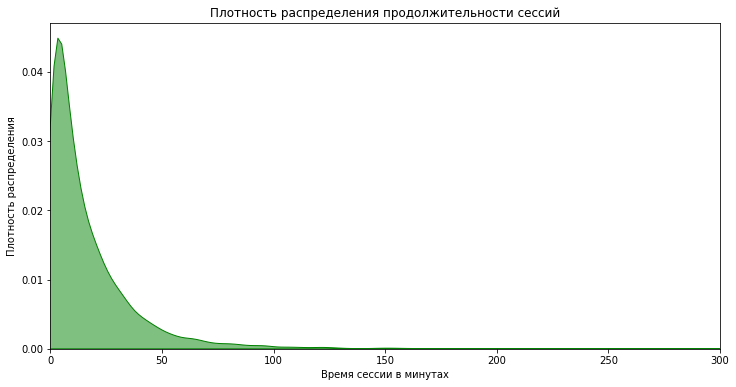

In [33]:
# Посмотрим график плотности распределения продолжительности сессий
plt.figure(figsize=(12, 6))
sns.kdeplot(unique_sessions['session_duration_sec'].div(60),
            color='green', 
            fill=True,
            linewidth=1,
            alpha=0.5,
           )
plt.xlim(0, 300)
plt.xlabel('Время сессии в минутах')
plt.ylabel('Плотность распределения')
plt.title('Плотность распределения продолжительности сессий')
plt.show()

**Промежуточный итог:**
* Сформировали сессии, за основу взяли тайм-аут в 30 минут. Т.к. после этого времени пользователь скорее всего перезагрузит страницу. 
* Добавили столбцы с началом и концом сессии, длиной сессии и длиной сессии в секундах. 
* Выяснили что имеется 2481 строк в основном датасете у которых продолжительность сессии была менее 5 секунд, мы их удалили чтобы исключить кратковременные или случайные взаимодействия пользователей.
* Высчитали что имеется 8036 сессий. 
* У нас сократилось количество уникальных пользователей на 101 и осталось 4192 пользователь, снижение не критичное. 
* Большая часть сессий не превышает и 22 минут.

#### Retention rate (удержание пользователей)
Для удобства расчета добавим ещё несколько столбцов

In [34]:
#добавляем первую сессию
data['first_session'] = (
    data.sort_values(['user_id', 'event_time'])
    .groupby('user_id')['event_time'].transform('min')
)

In [35]:
#для формирования когорт добавим данные о неделях
data['week'] = data['event_time'].dt.isocalendar().week
data['first_session_week'] = data['first_session'].dt.isocalendar().week 

In [36]:
#добавляем лайфтайм 
data['lifetime'] = data['week'] - data['first_session_week']

In [37]:
# Построим таблицу удержания
week_retention = data.pivot_table(index=['first_session_week'], columns='lifetime', 
                                  values='user_id', aggfunc='nunique')

#расчитываем размеры когорт
cohort_week = (
data.groupby('first_session_week').agg(cohort_size=('user_id','nunique'))
)

# объединяем размеры когорт и таблицу удержания
week_retention = cohort_week.merge(
    week_retention, on='first_session_week', how='left'
).fillna(0)

# делим данные таблицы удержания на размеры когорт
week_retention_percent = (
    week_retention.div(
    week_retention['cohort_size'], axis=0 )).mul(100).round(1)

week_retention.drop(columns=['cohort_size'], inplace=True)
week_retention_percent.drop(columns=['cohort_size'], inplace=True)

display(week_retention)
display(week_retention_percent)

,0,1,2,3
first_session_week,,,,
41,1064.0,200.0,123.0,81.0
42,1120.0,205.0,118.0,0.0
43,1072.0,178.0,0.0,0.0
44,936.0,0.0,0.0,0.0


,0,1,2,3
first_session_week,,,,
41,100.0,18.8,11.6,7.6
42,100.0,18.3,10.5,0.0
43,100.0,16.6,0.0,0.0
44,100.0,0.0,0.0,0.0


In [38]:
#удалим первую неделю для визаулизации
week_retention_percent.drop(week_retention_percent.columns[0], axis=1, inplace=True)

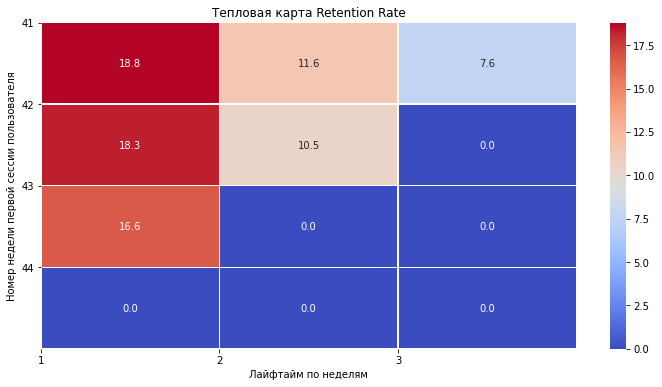

In [39]:
# Нарисовать тепловую карту
plt.figure(figsize=(12, 6))
sns.heatmap(week_retention_percent, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Тепловая карта Retention Rate')
plt.xlabel('Лайфтайм по неделям')
plt.ylabel('Номер недели первой сессии пользователя')
plt.xticks(ticks=range(0, len(week_retention_percent.columns)), labels=week_retention_percent.columns)
plt.yticks(ticks=range(0, len(week_retention_percent.index)), labels=week_retention_percent.index, rotation=0)
plt.show()

**Промежуточный итог:**
* Для расчета рейтинга удержания мы добавили столбцы с указанием даты первой сессии, нумерации недель, выделили первую неделю сессии, лайфтайм
* Расчитали конверсию по неделям, сформировав примерно равные когорты, в абсолютных числах и в процентах. Горизонт у нас составляет 27 дней, почти 4 недели. 
* Нарисовали тепловую карту
* Retention rate выглядит стабильным и постепенно падающим. Каждая следующая когорта на вторую неделю удерживает всё меньше пользователей. Первая когорта показывает удержание в 7.6% на четвёртую неделю.

#### Анализ частоты событий и конверсии.

In [40]:
#распределение событий по дням
frequency_day = data.groupby('date')[['event_name']].count().reset_index()
frequency_day.columns = ['date', 'event_count']
frequency_day['date'] = frequency_day['date'].dt.date
frequency_day['event_count'].describe()

count      28.000000
mean     2516.892857
std       385.322889
min      1739.000000
25%      2368.250000
50%      2578.000000
75%      2762.000000
max      3122.000000
Name: event_count, dtype: float64

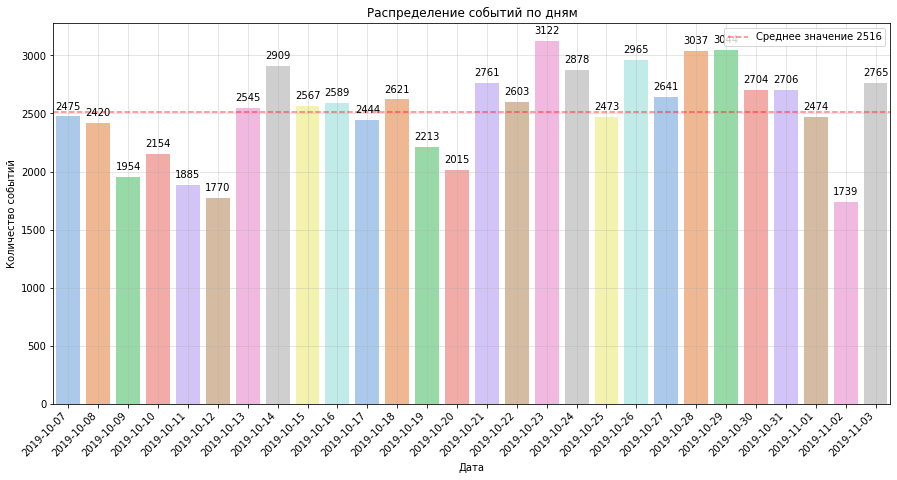

In [41]:
# Строим график
plt.figure(figsize=(15, 7))
sns.set_palette('pastel')
ax = sns.barplot(x='date', y='event_count', data=frequency_day, palette='pastel')

# Добавляем подписи и наклон с сеткой
plt.xticks(rotation=45, ha='right')
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий по дням')
plt.grid(alpha=0.4)

# Добавляем числовые значения в график
for p in ax.patches:
    height = p.get_height()
    plt.annotate(format(height, '.0f'),
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center',
                 xytext=(0, 10),
                 textcoords='offset points')

# Добавляем линию среднего показателя
mean_event_count = frequency_day['event_count'].mean()
plt.axhline(mean_event_count, color='red', linestyle='--', alpha=0.5, label='Среднее значение 2516')
plt.legend()

plt.show()

* В средний показатель действий в день, за наблюдаемый период, составляет 2516. Как мы види из графика события ожидаемо распределены не совсем равномерно.Во второй половине наблюдаемого периода частота событий, т.е. активность пользователей, больше т.к. количество действий больше среднего показателя. Правда 2.11.2019 зафиксировано самое низкое количество действий (1739) за наблюдаемый период.

In [42]:
# Посчитаем частоту событий
frequency_event = data.pivot_table(index='event_name', values='user_id', aggfunc='count').reset_index().sort_values(by='user_id', ascending=False)
frequency_event.columns = ['event_name', 'count']

# Добавляем столбец с процентом
frequency_event['percent'] = (frequency_event['count'] / frequency_event['count'].sum() * 100).round(1).map('{:.1f}%'.format)

# Посчитаем количество уникальных пользователей для каждого действия
unique_users_event = data.groupby('event_name')['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)
unique_users_event.columns = ['event_name', 'unique_users']
unique_users_event['percent_users'] = (unique_users_event['unique_users'] / data['user_id'].nunique() * 100).round(1).map('{:.1f}%'.format)

# Объединим таблицы
frequency_event = frequency_event.merge(unique_users_event, on='event_name')

frequency_event

,event_name,count,percent,unique_users,percent_users
0,tips_show,38899,55.2%,2749,65.6%
1,photos_show,8755,12.4%,1051,25.1%
2,search,6217,8.8%,1622,38.7%
3,advert_open,6082,8.6%,737,17.6%
4,contacts_show,4205,6.0%,941,22.4%
5,map,3636,5.2%,1409,33.6%
6,favorites_add,1377,2.0%,331,7.9%
7,tips_click,800,1.1%,320,7.6%
8,contacts_call,502,0.7%,197,4.7%


* Создали сводную таблицу, по столбцам
    * event_name - наименование события/действия
    * count - количество действия за наблюдаемый период
    * percent - доля события/действия среди всех событий/действий
    * unique_users - количество уникальных пользователей в событии/действии
    * persent_users - доля пользователей в событии/действии (конверсия в действие)

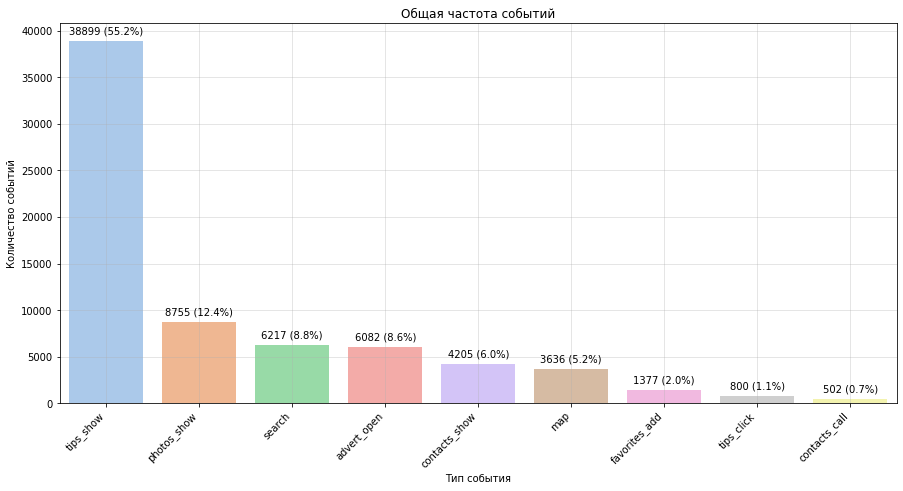

In [43]:
#строим график
plt.figure(figsize=(15, 7))
sns.set_palette('pastel')
ax = sns.barplot(x='event_name', y='count', data=frequency_event, palette='pastel')

#добавляем подписи и наклон с сеткой
plt.xticks(rotation=45, ha='right')
plt.xlabel('Тип события')
plt.ylabel('Количество событий')
plt.title('Общая частота событий')
plt.grid(alpha=0.4)

#добавим числовые значения в график
for p, perc in zip(ax.patches, frequency_event['percent']):
    ax.annotate(f"{format(p.get_height(), '.0f')} ({perc})",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

* График нам показывает что tips_show абсолютный лидер по частоте совершения действия и занимает 55.2% всех событий, но при этом клик по рекомендации tips_click довольно редкий, всего 800 и составляет 1.1% от всех событий

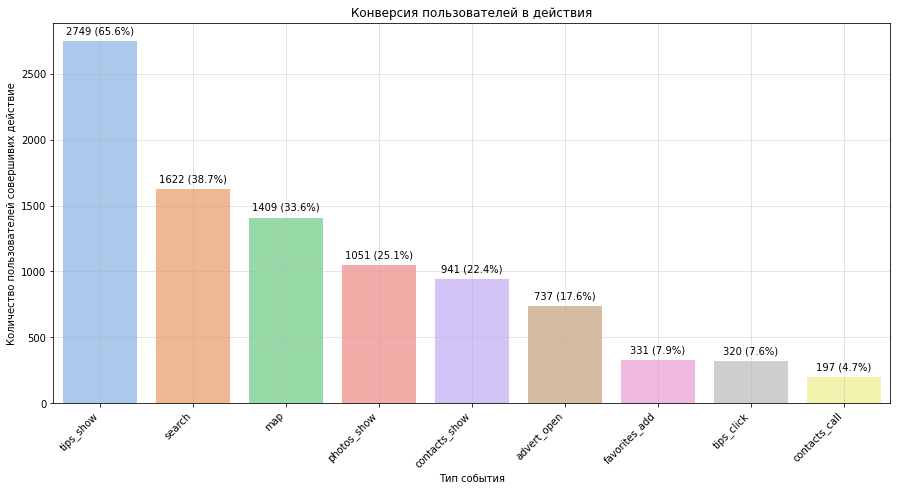

In [44]:
#строим график
plt.figure(figsize=(15, 7))
sns.set_palette('pastel')
ax = sns.barplot(x='event_name', y='unique_users', data=unique_users_event, palette='pastel')

#добавляем подписи и наклон с сеткой
plt.xticks(rotation=45, ha='right')
plt.xlabel('Тип события')
plt.ylabel('Количество пользователей совершивих действие')
plt.title('Конверсия пользователей в действия')
plt.grid(alpha=0.4)

#добавим числовые значения в график
for p, perc in zip(ax.patches, unique_users_event['percent_users']):
    ax.annotate(f"{format(p.get_height(), '.0f')} ({perc})",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

**Промежуточный итог:**
* Во второй половине наблюдаемого периода частота событий, т.е. активность пользователей, возрастает, это видно по графику, т.к. в этот период, в большинстве дней, количество действий больше среднего показателя.  Правда 2.11.2019 зафиксировано самое низкое количество действий (1739) за наблюдаемый период.
* Наибольшее количество зафиксированных действий относится к tips_show (пользователь увидел рекомендованные объявления) и это событие занимает 55.2% (38899) всех событий, можем предположить что этот показ идет в каком то автоматическом режиме, а вот клик по нему находится на предпоследнем месте, всего 1.1%(800). Наименьшее количество действий связано со звонком, оно совершено 502(0.7%) раза.
* На последнем графике мы видим 941 пользователь из 4192 совершил ключевое действие contacts_show, что составляет 22.4%, т.е. фактически каждый пятый. Но тут так же видно что поиском пользуется только 38.7% пользователей, а самое частое событие tips_show показывается 65.6% пользователей и при этом конверсия в клик по рекомендации составляет только 7.6%. Т.е. мы можем предположить что с показом рекомендованных объявлений и поиском что то не так.

### Cегментация и анализ в разрезе выделенных групп
#### Сегментация по времени сессии 
Как мы заметили ранее, 3/4 наших сессий не длится дольше 22 минут, средняя длина сессий составила 16:36, а медианное значение 9:40. Мы хотим разделить наших пользователей на равные группы по длине сессии т.к.анализ длительности сессий и ее соотношение с другими метриками, может помочь в оценке эффективности сайта объявлений и оптимизации пользовательского опыта. Мы предполагаем и ожидаем, пользователи с длинными сессиями показывают лучшие показатели нежели короткие. На основании полученных результатов можно будет сформулировать практические рекомендации. 

In [45]:
#проверим сколько сессий приходится на пользователя
session_counts = pd.pivot_table(data, index='user_id', values='session_id', aggfunc='nunique').sort_values(by='session_id', ascending=False )
display(session_counts['session_id'].describe())
display(session_counts.head(10))

count    4192.000000
mean        1.916985
std         2.443888
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        60.000000
Name: session_id, dtype: float64

,session_id
user_id,
21230dd9-2f7f-4b77-a436-43d4d10388e0,60
cb36854f-570a-41f4-baa8-36680b396370,41
e13f9f32-7ae3-4204-8d60-898db040bcfc,34
1580911b-65db-4f1a-be7e-1ca39becac30,30
be1449f6-ca45-4f94-93a7-ea4b079b8f0f,30
e38cb669-7335-4d56-9de5-c8d5d2f13fd3,24
fffb9e79-b927-4dbb-9b48-7fd09b23a62b,24
abdcbe3c-221b-4f59-afd9-bf9ca78f7e4c,23
25069cad-0d00-48cb-a627-0871a877307e,22


In [46]:
#для начала создадим новый столбец с указанием средней продолжительности сессии для каждого пользователя
#берем среднюю так как у большей части пользователей не больше одной сессии, хотя при этом этом есть пользователи с 60 сессиями
data['mean_session_duration_sec'] = data.groupby('user_id')['session_duration_sec'].transform('mean')

In [47]:
#оставим только по 1 записи на пользователя, чтобы избежать пересечений и посмотрим стат анализ
unique_user = data[data['user_id'].duplicated() == False]
unique_user['mean_session_duration_sec'].describe()

count     4192.000000
mean      1084.505622
std       1187.554769
min          6.000000
25%        325.992308
50%        719.250000
75%       1433.967391
max      19318.000000
Name: mean_session_duration_sec, dtype: float64

In [48]:
#создаем функцию распределения пользователей по группам
#для простоты и равномерности распределения пользователей создадим 4 группы по 25% от стат анализа
def add_group_column(data):
    
    data['group'] = ''

    # Присваиваем группы на основе значения 'session_duration_sec'
    data.loc[data['mean_session_duration_sec'] < unique_user['mean_session_duration_sec'].describe().loc['25%'], 'group'] = 'A'
    data.loc[(data['mean_session_duration_sec'] >= unique_user['mean_session_duration_sec'].describe().loc['25%']) & (data['mean_session_duration_sec'] < unique_user['mean_session_duration_sec'].describe().loc['50%']), 'group'] = 'B'
    data.loc[(data['mean_session_duration_sec'] >= unique_user['mean_session_duration_sec'].describe().loc['50%']) & (data['mean_session_duration_sec'] < unique_user['mean_session_duration_sec'].describe().loc['75%']), 'group'] = 'C'
    data.loc[data['mean_session_duration_sec'] >= unique_user['mean_session_duration_sec'].describe().loc['75%'], 'group'] = 'D'

    return data

In [49]:
# Вызываем функцию и проверяем
data_with_groups = add_group_column(data)
data.sample(5)

,event_time,event_name,user_id,date,source,session_id,session_start,session_end,session_duration,session_duration_sec,first_session,week,first_session_week,lifetime,mean_session_duration_sec,group
71686,2019-11-03 10:58:02,advert_open,3fbb69e4-0cc6-441b-81e0-5fa27bf69168,2019-11-03,other,10212,2019-11-03 08:39:37,2019-11-03 11:20:36,0 days 02:40:59,9659.0,2019-11-03 08:39:37,44,44,0,9659.000000,D
46772,2019-10-25 09:24:25,tips_show,5eaab80f-1bf9-4094-8b07-c4b04ae87cbc,2019-10-25,other,6698,2019-10-25 09:23:32,2019-10-25 09:24:38,0 days 00:01:06,66.0,2019-10-21 19:35:21,43,43,0,1741.192982,D
28637,2019-10-23 11:57:08,search,ab5921ad-3327-4a94-80b7-5fb8dd4f977a,2019-10-23,other,4048,2019-10-23 11:57:08,2019-10-23 12:08:53,0 days 00:11:45,705.0,2019-10-15 16:31:52,43,42,1,508.680000,B
22850,2019-10-19 17:16:23,advert_open,04adf25e-cb60-4cbd-bedc-ddc1057cde06,2019-10-19,other,3236,2019-10-19 16:51:18,2019-10-19 17:31:41,0 days 00:40:23,2423.0,2019-10-13 15:41:09,42,41,1,1313.192661,C
71673,2019-11-03 10:20:33,advert_open,3fbb69e4-0cc6-441b-81e0-5fa27bf69168,2019-11-03,other,10212,2019-11-03 08:39:37,2019-11-03 11:20:36,0 days 02:40:59,9659.0,2019-11-03 08:39:37,44,44,0,9659.000000,D


In [50]:
#посмотрим размеры групп
data.groupby('group')['user_id'].nunique().reset_index().sort_values(by='user_id', ascending=False)

,group,user_id
0,A,1048
1,B,1048
2,C,1048
3,D,1048


In [51]:
#все работает, обновим unique_user, и на его основании сделаем срезы по группам
group_a = data.query('group== "A"')
group_b = data.query('group== "B"')
group_c = data.query('group== "C"')
group_d = data.query('group== "D"')

**Промежуточный итог:**  
* Создали дополнительный столбец с указание средней длины сессии для пользователя
* Создали 4 группы и распределили по ним в равном количестве пользователей учитывая среднюю продолжительность их сессии. 

In [52]:
group_a['user_id'].nunique() + group_b['user_id'].nunique() + group_c['user_id'].nunique() + group_d['user_id'].nunique()

4192

#### Retention rate в разрезе выделенных групп


In [53]:
#делаем функцию
def retention(group, group_name):
    #таблица удержания
    result_grouped = group.pivot_table(index=['first_session_week'], columns='lifetime', 
                                  values='user_id', aggfunc='nunique')
    #размер когорты
    cohort_sizes = (group.groupby('first_session_week').agg(cohort_size=('user_id','nunique')))

    #объединение
    result_grouped = cohort_sizes.merge(result_grouped, on='first_session_week', how='left').fillna(0)
    
    #делим данные таблицы удержания на размеры когорт
    result_grouped = (result_grouped.div(result_grouped['cohort_size'], axis=0 )).mul(100).round(1)

    #удаляем лишние столбцы 
    result_grouped.drop(columns=['cohort_size'], inplace=True) 
    result_grouped.drop(result_grouped.columns[0], axis=1, inplace=True)
    
    #строим графики
    plt.figure (figsize=(10,3))
    sns.heatmap(result_grouped, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
    plt.xlabel('Лайфтайм по неделям')
    plt.ylabel('Первая неделя сессии')
    plt.title("Retention rate '{}'".format(group_name))

,cohort_size
first_session_week,
41,257
42,265
43,273
44,253


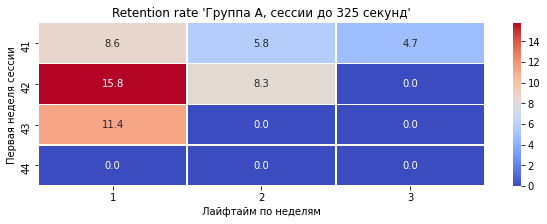

In [54]:
cohort_sizes_a = (group_a.groupby('first_session_week').agg(cohort_size=('user_id','nunique')))
display(cohort_sizes_a)
retention(group_a, 'Группа А, сессии до 325 секунд')

,cohort_size
first_session_week,
41,275
42,254
43,283
44,236


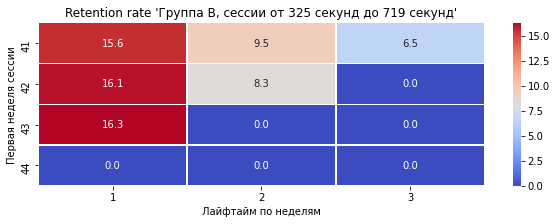

In [55]:
cohort_sizes_b = (group_b.groupby('first_session_week').agg(cohort_size=('user_id','nunique')))
display(cohort_sizes_b)
retention(group_b, 'Группа B, сессии от 325 секунд до 719 секунд')

,cohort_size
first_session_week,
41,268
42,316
43,244
44,220


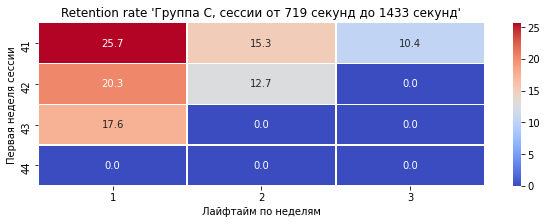

In [56]:
cohort_sizes_c = (group_c.groupby('first_session_week').agg(cohort_size=('user_id','nunique')))
display(cohort_sizes_c)
retention(group_c, 'Группа C, сессии от 719 секунд до 1433 секунд')

,cohort_size
first_session_week,
41,264
42,285
43,272
44,227


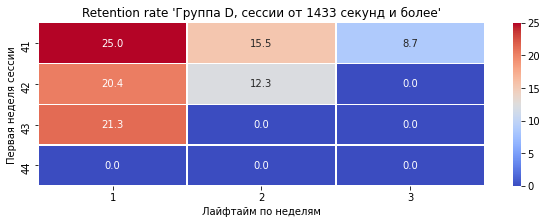

In [57]:
cohort_sizes_d = (group_d.groupby('first_session_week').agg(cohort_size=('user_id','nunique')))
display(cohort_sizes_d)
retention(group_d, 'Группа D, сессии от 1433 секунд и более')

**Промежуточный итог:**
* В каждой группе получились, если исключить когорту 44 недели, по 3 когорты от 244 до 316 пользователей в каждой.
* Результаты группы D довольно сильно выделяется,и показывают на вторую неделю retention от 20.4% до 25.0%, а в последнюю неделю 8.7%, довольно близко, а в некоторых местах показывая лучшие результаты, идет группа C. Когда как у групп A и B показатели retention довольно сильно уступают. 
* Более длительные сессии у пользователей показывают лучшее удержание пользователя.

#### Конверсия в разрезе выделенных групп

In [58]:
def conversion(group):
    conversion = round(group.query('event_name == "contacts_show"')['user_id'].nunique() / group['user_id'].nunique() * 100, 1)
    return conversion

In [59]:
display(f"Конверсия группы А (сессии до 325 секунд) составила {conversion(group_a)}%")

'Конверсия группы А (сессии до 325 секунд) составила 18.7%'

In [60]:
display(f"Конверсия группы B (сессии от 325 секунд до 719 секунд) составила {conversion(group_b)}%")

'Конверсия группы B (сессии от 325 секунд до 719 секунд) составила 20.2%'

In [61]:
display(f"Конверсия группы C (сессии от 719 секунд до 1433 секунд) составила {conversion(group_c)}%")

'Конверсия группы C (сессии от 719 секунд до 1433 секунд) составила 21.9%'

In [62]:
display(f"Конверсия группы D (сессии от 1433 секунд и более) составила {conversion(group_d)}%")

'Конверсия группы D (сессии от 1433 секунд и более) составила 29.0%'

**Промежуточный итог:**
* После расчета конверсий мы видим что группа D набирает 29%, Группа С 21,9%, группа B 20.2%, группа A 18.7%
* У групп с пользователями с более продолжительными сессиями конверсия в целевое действие выше.

#### Итог сегментации и анализа в разрезе выделенных групп
* При сегментации мы разделили пользователей на 4 примерно равные группы, взяв за критерий длину сессии, а также разделив группы на 4 когорты учитывая неделю первой сессии.
* При расчете retention rate в разрезе выделенных групп, в лучшую сторону выделяются группа D и C по всем неделям и когортам. Группы  A и B довольно сильно им уступают в этом показателе.
* При расчете конверсии в ключевое действие contacts_show, так же, в лучшую сторону, выделяется группа D:
    * Конверсия группы А составила 18.7%
    * Конверсия группы B составила 20.2%
    * Конверсия группы C составила 21.9%
    * Конверсия группы D составила 29.0%
* Получается что пользователи длительных сессий показывают лучший ретеншн и конверсию. Это можно объяснить тем что у пользователей с длинными сессиями более положительный пользовательский опыт приложением. В противополножность этому пользователи с короткими сессиями показывают сравнительно низкие показатели, возможно они не до конца разобрались в  приложении или им не удобно им пользоваться. 

### Проверка статистических гипотез 

#### Первая гипотеза
**Некоторые пользователи установили приложение по ссылке из yandex, другие — из google.**    
*Гипотеза Н0* : пользователи этих двух групп демонстрируют одинаковую конверсию в просмотры контактов  
*Гипотеза Н1* : пользователи этих двух групп демонстрируют разную конверсию в просмотры контактов    
*Alpha* : 0.05  

* Но сначало посмотрим откуда и сколько у нас пользователей

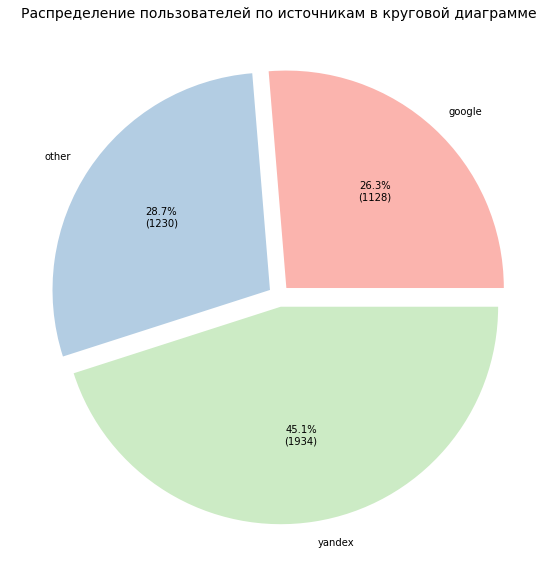

In [63]:
#Сначала посмотрим откуда и сколько у нас пользователей
#посмотрим откуда к нам приходят пользователи
source_count = pd.pivot_table(mobile_sourсes, values='user_id', index='source', aggfunc=['count'])
source_count.columns = ['users_count']
source_count['percentage'] = (source_count['users_count'] / source_count['users_count'].sum() * 100).round(1).astype(str) + '%'
source_count.sort_values(by='users_count', ascending=False)

# Создаем круговую диаграмму
fig, ax = plt.subplots(figsize=(15, 10))
explode = [0.05] * len(source_count)  # установка расстояния между секторами
colors = plt.get_cmap('Pastel1').colors[:len(source_count)]
ax.pie(source_count['users_count'], labels=source_count.index,
       autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100.*source_count['users_count'].sum())})",
       textprops={'fontsize': 10}, explode=explode, colors=colors)
ax.set_title('Распределение пользователей по источникам в круговой диаграмме', fontsize=14)
plt.show()

In [64]:
#Создаем группы пользователей пришедших к нам из яндекса и гугла

#группа яндекса
yandex_target_actions = (data.query('source == "yandex" and event_name == "contacts_show"')['user_id'].nunique())
yandex_count = (data.query('source == "yandex"')['user_id'].nunique())

#группа гугла
google_target_actions = (data.query('source == "google" and event_name == "contacts_show"')['user_id'].nunique())
google_count = (data.query('source == "google"')['user_id'].nunique())

#группа other(предположительно органики), нас не просили, но любопытно
other_target_actions = (data.query('source == "other" and event_name == "contacts_show"')['user_id'].nunique())
other_count = (data.query('source == "other"')['user_id'].nunique())

#расчет конверсии
yandex_conversion = round(yandex_target_actions / yandex_count * 100, 1)
google_conversion = round(google_target_actions / google_count * 100, 1) 
other_conversion = round(other_target_actions / other_count * 100, 1)


#выводим результат
display(f" Пользователей пришедших по ссылке яндекса {yandex_count}, из них {yandex_target_actions} сделали целевое действие, и конверсия составила {yandex_conversion}%")
display(f" Пользователей пришедших по ссылке гугла {google_count}, из них {google_target_actions} сделали целевое действие, и конверсия составила {google_conversion}%")
display(f" Пользователей из других источников {other_count}, из них {other_target_actions} сделали целевое действие, и конверсия составила {other_conversion}%")

' Пользователей пришедших по ссылке яндекса 1889, из них 465 сделали целевое действие, и конверсия составила 24.6%'

' Пользователей пришедших по ссылке гугла 1114, из них 268 сделали целевое действие, и конверсия составила 24.1%'

' Пользователей из других источников 1189, из них 208 сделали целевое действие, и конверсия составила 17.5%'

In [65]:
#проверка гипотезы
#используем стандартный уровень критической статистической значимости - 5%
alpha = .05 

successes = np.array([yandex_target_actions, google_target_actions])
trials = np.array([yandex_count, google_count])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

print(successes[0], successes[1], trials[0] ,trials[1])

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
else:
    print(
       'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет'
    )

465 268 1889 1114
p-значение:  0.7305905124884227
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


#### Вторая гипотеза 
Ранее мы выяснили, что из 4192 пользователей только 1622 пользуется поиском, что составляет 38.7%, отличаются ли конверсия в целевое действие таких пользователей?  
**Часть пользователей использует поиск, другие этого не делают.**   
*Гипотеза Н0*: пользователи этих двух групп демонстрируют одинаковую конверсию в просмотры контактов   
*Гипотеза Н1*: пользователи этих двух групп демонстрируют разную конверсию в просмотры контактов  
*Alpha* : 0.05  

In [66]:
#Создаем группы пользователей

#группа пользователей поиска
search_group_list = data[data['event_name'] == 'search']['user_id'].unique()
search_group_count = len(search_group_list)
search_group_ta = data[data['user_id'].isin(search_group_list) & (data['event_name'] == 'contacts_show')]['user_id'].nunique()

#остальные пользователи
other_users_list = set(data['user_id'].unique())-set(search_group_list)
other_users_count = len(other_users_list)
other_users_ta = data[data['user_id'].isin(other_users_list) & (data['event_name'] == 'contacts_show')]['user_id'].nunique()

#расчет конверсии
search_group_conversion = round(search_group_ta / search_group_count * 100, 1)
other_users_conversion = round(other_users_ta / other_users_count * 100, 1) 

#выводим результат
display(f" Пользователей использующих поиск {search_group_count}, из них {search_group_ta} сделали целевое действие, и конверсия составила {search_group_conversion}%")
display(f" Пользователей не использующих поиск {other_users_count}, из них {other_users_ta} сделали целевое действие, и конверсия составила {other_users_conversion}%")

' Пользователей использующих поиск 1622, из них 347 сделали целевое действие, и конверсия составила 21.4%'

' Пользователей не использующих поиск 2570, из них 594 сделали целевое действие, и конверсия составила 23.1%'

In [67]:
#проверка гипотезы
#используем стандартный уровень критической статистической значимости - 5%
alpha = .05 

successes = np.array([search_group_ta, other_users_ta])
trials = np.array([search_group_count, other_users_count])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1) 

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу, между выборками есть статистически значимые различия')
else:
    print(
       'Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет'
    )

p-значение:  0.19374679112507165
Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в выборках нет


#### Итог проверки статистических гипотез:
* По первой гипотезе о разности конверсий групп пользователей пришедших через яндекс и через гугл. У нас нет оснований утверждать, что группы пришедшие через гугл и яндекс значимо различаются. Тест говорит что статистически значимой разницы между группами нет.
    * Пользователей пришедших по ссылке яндекса 1889, из них 465 сделали целевое действие, и конверсия составила 24.6%
    * Пользователей пришедших по ссылке гугла 1114, из них 268 сделали целевое действие, и конверсия составила 24.1%
* По второй гипотезе о разности конверсий групп пользователей использующих функцию search в приложении, от тех кто не искользует данную функцию. У нас нет оснований утверждать что эти группы, тоже, значимо различаются. Тест говорит что статистически значимой разницы между группами нет.
    * Пользователей использующих поиск 1622, из них 347 сделали целевое действие, и конверсия составила 21.4%
    * Пользователей не использующих поиск 2570, из них 594 сделали целевое действие, и конверсия составила 23.1%

### Итоги исследования, практические рекомендации.
#### Итоги
* Мы ознакомились с 2 датасетами mobile_sourсes(имеет 2 столбца один из которых уникальный идентификатор пользователя, второй источник из которого к нам пришел пользователь), mobile_dataset (имеет 3 столбца, первый о дате и времени действия пользователя, второй о наименовании действия, третий уникальный идентификатор пользователя), которые имеют 4293 и 74197 строк соответственно 
* Нами проведена работа по предобработке данных, а именно:
    * Наименования столбцом таблицы приведены в единообразный вид
    * События столбца event_name, такие как, search_1-search_7 и contacts_show-show_contacts, объеденены в search и contacts_show соответственно
    * Создан новый столбец date в котором указана только дата события в формате datetime, столбец event_time так же приведет к этому формату и в нем убрали милисекунды т.к. они нам не нужны для дальнейшего исследования
    * Пропусков данных не обнаружено.
    * Обнаружено 1190 строк явных дубликатов, это небольшая часть из 74197 строк, поэтому мы решили их удалить во избежание ошибок во время исследования
    * Объединили датасеты и назвали его data.
    * Проверили даты в датасете, они соответствуют заявленным с 7 октября 2019 по 03 ноября 2019
* Во время исследовательского анализа данных проведены:
    * Определение сессии пользователей (по тайм-ауту) и их длительность:
        * Сессия считается завершенной если тайм-аут достигает 30 минут. Период в 30 был взят т.к. это является достаточно распространенной практикой и настройкой по умолчанию во многих системах. 
        * Создали 5 столбцов, с идентификатором сессии, временем начала сессии, временем конца сессии, длительность сессии в формате день:час:минута:секунда, длительность сессии в секундах
        * Обнаружили 2481 строк с длиной сессии менее 5 секунд и решили их удалить т.к. это могли быть случайные действия пользователей.
        * Насчитали наличие 8036 сессий и 4192 оставшихся уникальных пользователей
        * Стат данные и визуализация показали нам что большая часть сессий не длится больше 22 минут
    * Расчет общего Retention rate (удержание пользователей)
        * Для расчета лайфтайма мы добавили столбцы с указанием даты первой сессии, номер недели и номер недели первой сессии
        * Сформировали 4 примерно равные когорты и расчитали retention и визуализировали её в тепловой карте, который показывает что общее удержаниена вторую неделю составляло с 18.8%, 18.3%, 16.6%, на третью 11.6% и 10.5%, а на четвертую 7.6%
    * Анализ частоты событий и конверсии
        * Стат данные показывали что в среднем в день, за наблюдаемый период, было 2516 событий. Но график распределения частоты событий в день показывает что пользователи были более активны во второй половине наблюдаемого периода, когда как в первой половине их активность не часто превышало средний показатель. 
        * Большую часть всех событий составляет tips_show (пользователь увидел рекомендованное объявление), в абсолютных цифрах 38899 раз, что составляет 55.2% от всех событий, совершили это действие 2749 пользователей что составляет 65.6% всех пользователей. Что касается нашего целевого действия contacts_show (пользователь посмотрел номер телефона), его совершили 4205 раз, что составляет 6% от всех событий, совершили это действие 941 пользователь т.е. конверсия в целевое действие составила 22.4%.
* Cегментация и анализ в разрезе выделенных групп  
    * При сегментации мы разделили сессии на 4 примерно равные группы, взяв за критерий длину сессии в этом нам помогли стат данные длины сессий, а также разделив группы на 4 когорты учитывая неделю первой сессии.
    * При расчете retention rate в разрезе выделенных групп, в лучшую сторону выделяются группа D и C по всем неделям и когортам. Группы A и B довольно сильно им уступают в этом показателе.
    * При расчете конверсии в ключевое действие contacts_show, так же, в лучшую сторону, выделяется группа D с 29%, тогда как остальные группы примерно равны друг с другом:
    * Получается что длительные сессии показывают лучший ретеншн и конверсию, что можно объяснить тем что в длительных сессиях преобладают пользователи с положительным пользовательским опытом, когда как в коротких таковых наоборот меньше.
* Проверка статистических гипотез
    * По первой гипотезе о разности конверсий групп пользователей пришедших через яндекс и через гугл. У нас нет оснований утверждать, что группы пришедшие через гугл и яндекс значимо различаются. Тест говорит что статистически значимой разницы между группами нет.
    * Пользователей пришедших по ссылке яндекса 1889, из них 465 сделали целевое действие, и конверсия составила 24.6%
    * Пользователей пришедших по ссылке гугла 1114, из них 268 сделали целевое действие, и конверсия составила 24.1%
* По второй гипотезе о разности конверсий групп пользователей использующих функцию search в приложении, от тех кто не искользует данную функцию. У нас нет оснований утверждать что эти группы, тоже, значимо различаются. Тест говорит что статистически значимой разницы между группами нет.
    * Пользователей использующих поиск 1622, из них 347 сделали целевое действие, и конверсия составила 21.4%
    * Пользователей не использующих поиск 2570, из них 594 сделали целевое действие, и конверсия составила 23.1%

#### Практические рекомендации
* Исходя из вышеперечисленного мы можем предположить что пользователям с короткой сессией непонятен интерфейс. Возможно стоит внедрить систему обучения, если таковой нет, для новых пользователей это улучшит опыт пользования приложением. 
* Так же возможно стоит расмотреть возможность уменьшения количества показываемых рекомендованных объявлений или улучшения таргетирования, т.к. показывается их огромное количество(55.2% всех событий), а перешли по ним только 7.6% пользователей.
* Стоит улучшить систему поиска, возможно добавить дополнительные фильтры, т.к. конверсия людей которые что то ищут через поиск, хоть и статистически не значимо, но ниже, чем у тех кто им не пользуеться, это может обозначать что они просто не могут найти то что ищут. 